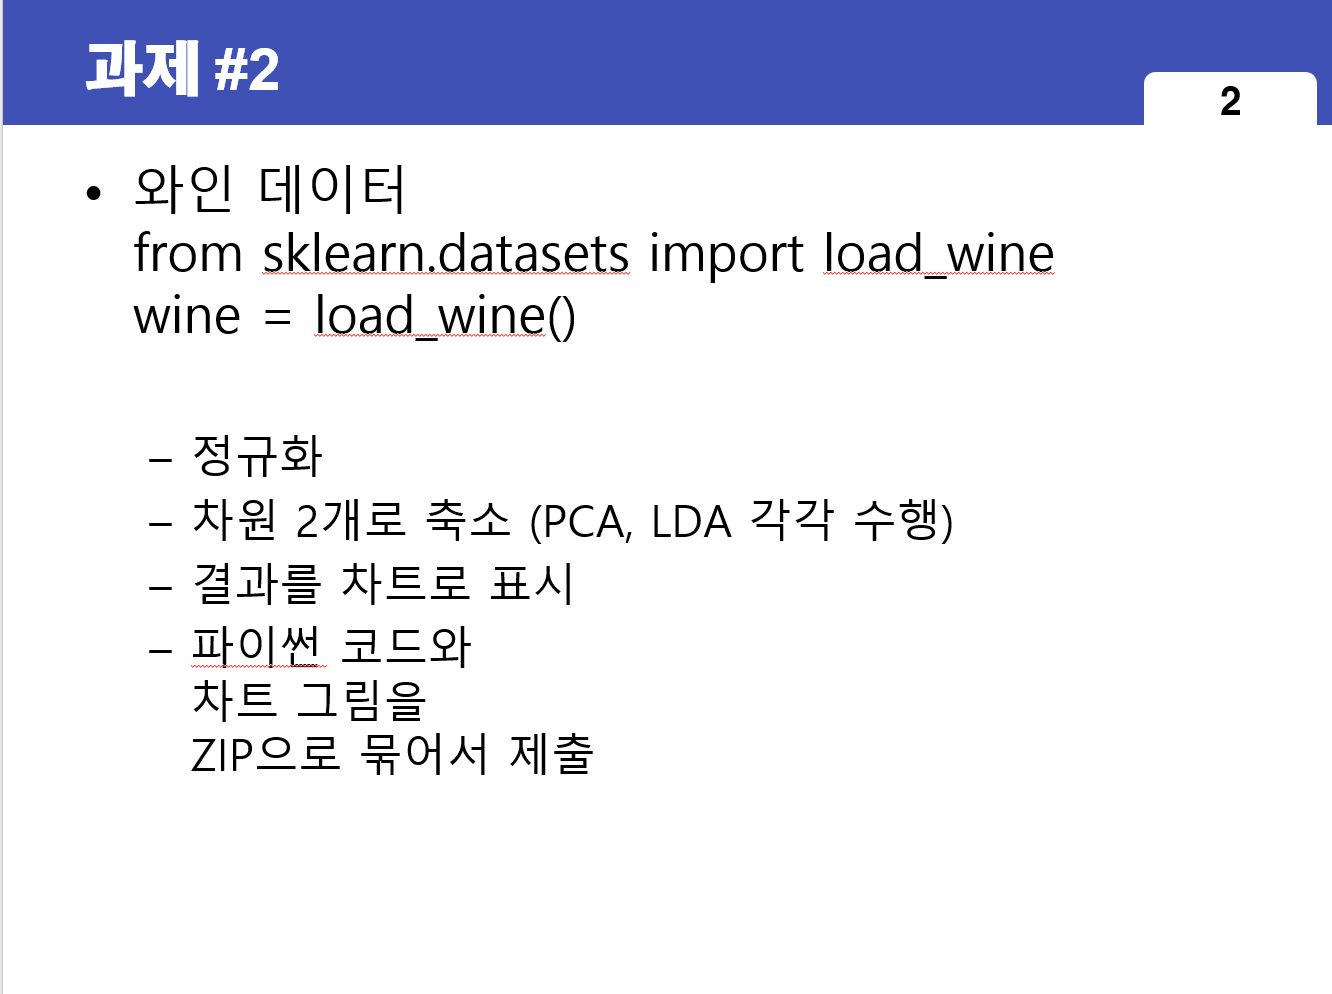

In [32]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


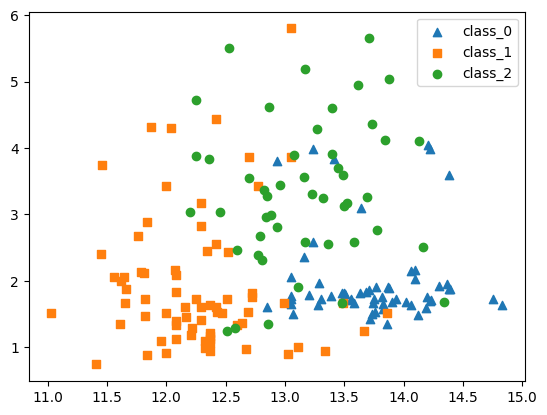

In [33]:
# 차원 축소 적용 전 차트
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = df[df['target'] == i].iloc[:, 0]
    y = df[df['target'] == i].iloc[:, 1]
    plt.scatter(x, y, marker = marker, label = wine.target_names[i])
plt.legend()
plt.show()

In [34]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
wine_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

In [35]:
# PCA 적용
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
wine_pca = pca.fit_transform(wine_scaled)
df2 = pd.DataFrame(wine_pca, columns = ['comp1', 'comp2'])
df2['target'] = wine.target

df2.head()

,comp1,comp2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


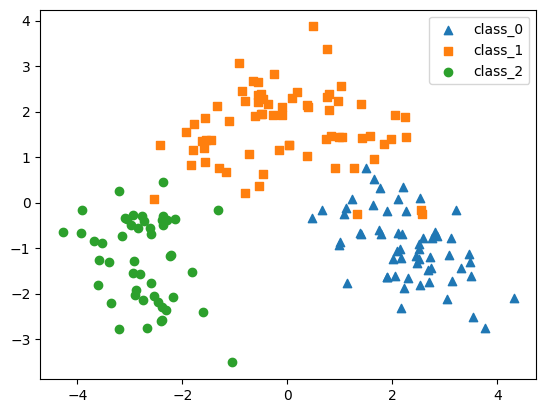

In [36]:
# PCA 적용 차트
for i, marker in enumerate(markers):
    x = df2[df2['target'] == i].iloc[:, 0]
    y = df2[df2['target'] == i].iloc[:, 1]
    plt.scatter(x, y, marker = marker, label = wine.target_names[i])
plt.legend()
plt.show()

In [37]:
# LDA 적용
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)
df3 = pd.DataFrame(wine_lda, columns = ['comp1', 'comp2'])
df3['target'] = wine.target

df3.head()

,comp1,comp2,target
0,-4.700244,1.979138,0
1,-4.301958,1.170413,0
2,-3.420720,1.429101,0
3,-4.205754,4.002871,0
4,-1.509982,0.451224,0


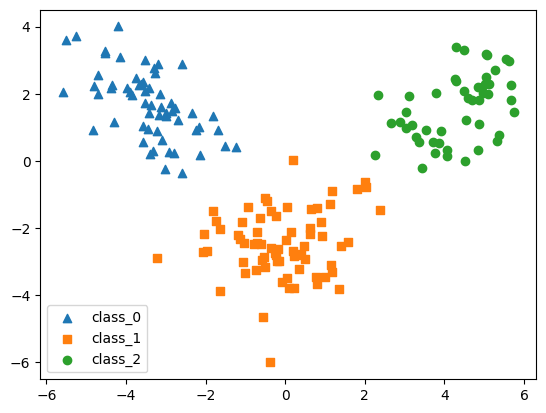

In [38]:
# LDA 적용 차트
for i, marker in enumerate(markers):
    x = df3[df3['target'] == i].iloc[:, 0]
    y = df3[df3['target'] == i].iloc[:, 1]
    plt.scatter(x, y, marker = marker, label = wine.target_names[i])
plt.legend()
plt.show()